In [2]:
# import library
import sklearn
import numpy
import pandas as pd
import pickle
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#import data after preprocessing
train_df = pd.read_csv("./project_data_files/book_rating_train.csv")
test_df = pd.read_csv("./project_data_files/book_rating_test.csv")
X_train = load_npz('x_train_docvec_249.npz')
X_test = load_npz('x_test_249.npz')
y_train = train_df['rating_label']

In [12]:
# split train and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)

(18450, 249)


In [5]:
def output_predictions(prediction):
    #output result
    output_df = pd.DataFrame({'rating_label': prediction})
    output_df.index += 1
    output_df.index.name = 'id'
    output_df.to_csv('./predictions.csv')
    return

In [13]:
from sklearn.neighbors import KNeighborsClassifier

param = {
    'n_neighbors': list(range(10,100, 10))
}
gsearch = GridSearchCV(estimator=KNeighborsClassifier(weights='distance'), param_grid=param, cv=3)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

In [14]:
print( gsearch.best_params_, gsearch.best_score_)

{'n_neighbors': 80} 0.702439024390244


In [15]:
knn_w = KNeighborsClassifier(n_neighbors=80, weights='distance')
knn_w.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=80, weights='distance')

In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,7))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Olivia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

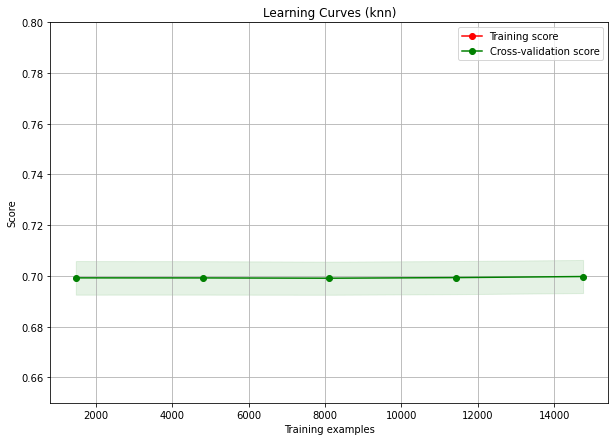

In [17]:
title = r"Learning Curves (knn)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = knn_w    #建模
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.5, 1), cv=cv, n_jobs=1)

In [69]:
acc = knn_w.score(X_val, y_val)
print(acc)
prediction = knn_w.predict(X_test)
output_predictions(prediction)

0.7119011489269456
